# Notebook to evaluate variable importance

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv ('../../data/creditcard_v2.csv')

In [4]:
df_smote = pd.read_csv ('../../data/creditcard_train.csv')

## 1. Random Forest

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
X = df.iloc [:, 1:-1]
y = df.Class

In [7]:
X_smote = df_smote.iloc [:, 0:-1]
y_smote = df_smote.Class

In [9]:
rf = RandomForestClassifier (n_estimators = 100, random_state = 42)
model = rf.fit (X, y)

In [10]:
rf = RandomForestClassifier (n_estimators = 100, random_state = 42)
model_smote = rf.fit (X_smote, y_smote)

In [11]:
variable_importance = (
    pd.DataFrame (
        [X_smote.columns, model.feature_importances_, model_smote.feature_importances_])
    .transpose ()
    .sort_values (by = 1, ascending = False))

In [12]:
variable_importance.columns = ['Variable','Importance','Smote_Importance']

In [18]:
variable_importance [['Variable', 'Importance']].head (12).Variable.values

array(['V17', 'V10', 'V12', 'V14', 'V16', 'V11', 'V9', 'V4', 'V18', 'V7',
       'V26', 'V20'], dtype=object)

In [19]:
(variable_importance [['Variable', 'Smote_Importance']].head (12).sort_values (by = 'Smote_Importance', ascending = False)
.Variable.values)

array(['V10', 'V14', 'V12', 'V11', 'V17', 'V4', 'V16', 'V7', 'V18', 'V9',
       'V20', 'V26'], dtype=object)

## 2. Logistic Regression using standardised coefficients

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale

In [71]:
lr = LogisticRegression (random_state = 42, solver = 'sag', max_iter=1000)

In [72]:
X_lr = pd.DataFrame (scale (X), columns = X.columns)
X_smote_lr = pd.DataFrame (scale (X_smote), columns = X.columns)

In [73]:
model_lr = lr.fit (X_lr, y)
model_smote_lr = lr.fit (X_smote_lr, y_smote)

In [76]:
model_lr.coef_

array([[ 0.63750354, -0.28170398,  0.6577945 ,  2.14316519, -0.06958141,
        -0.18935864,  0.63149515, -1.13657166, -0.30590214, -1.76720345,
         1.08133391, -2.33172986, -0.17230685, -3.67557311, -0.06953012,
        -0.82859581, -2.10553729, -0.32663407, -0.01632242, -0.21177234,
         0.02720429,  0.01286367,  0.09866292, -0.04396449,  0.31067115,
        -0.17939028,  0.07563425,  0.20201437,  0.14020153]])

In [90]:
abs (model_smote_lr.coef_ [0])

array([0.63750354, 0.28170398, 0.6577945 , 2.14316519, 0.06958141,
       0.18935864, 0.63149515, 1.13657166, 0.30590214, 1.76720345,
       1.08133391, 2.33172986, 0.17230685, 3.67557311, 0.06953012,
       0.82859581, 2.10553729, 0.32663407, 0.01632242, 0.21177234,
       0.02720429, 0.01286367, 0.09866292, 0.04396449, 0.31067115,
       0.17939028, 0.07563425, 0.20201437, 0.14020153])

In [91]:
variable_coefficient = (
    pd.DataFrame (
        [X_lr.columns, abs (model_lr.coef_ [0])])
    .transpose ()
    .sort_values (by = 1, ascending = False))

In [92]:
variable_coefficient

,0,1
13,V14,3.67557
11,V12,2.33173
3,V4,2.14317
16,V17,2.10554
9,V10,1.7672
7,V8,1.13657
10,V11,1.08133
15,V16,0.828596
2,V3,0.657795
0,V1,0.637504


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

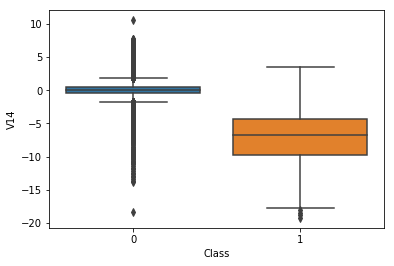

In [25]:
sns.boxplot (x = 'Class', y = 'V14', data = df)

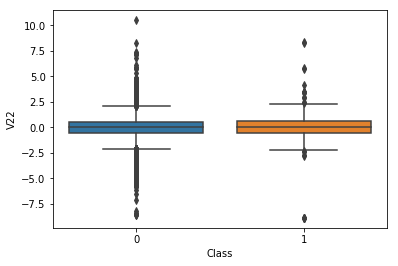

In [23]:
sns.boxplot (x = 'Class', y = 'V22', data = df)